<a href="https://colab.research.google.com/github/SejalLambat19/DL-LAB-NEW/blob/main/dL_PRACT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

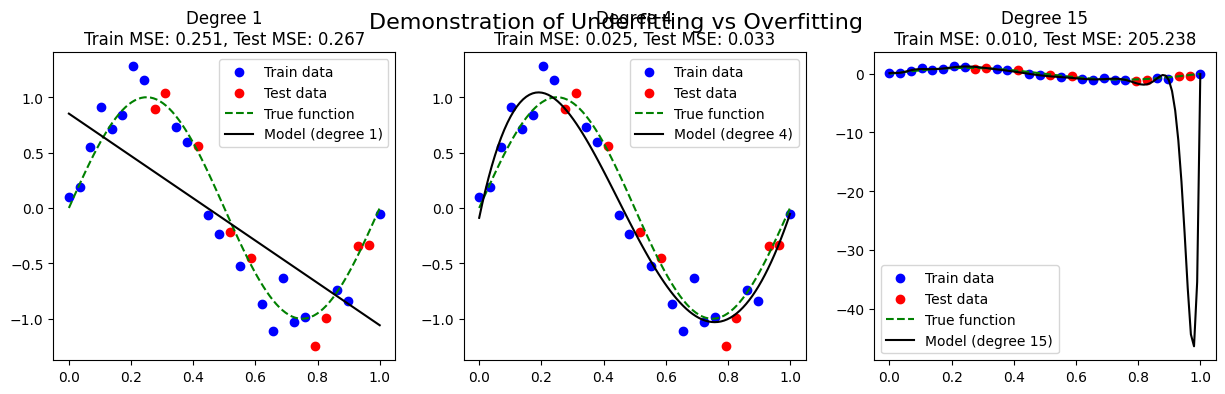

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ------------------ Step 1: Generate synthetic dataset ------------------
np.random.seed(42)
X = np.linspace(0, 1, 30)
y_true = np.sin(2 * np.pi * X)  # true relationship
y = y_true + np.random.normal(0, 0.2, size=len(X))  # add noise
X = X.reshape(-1, 1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------ Step 2: Fit polynomial models of varying degrees ------------------
degrees = [1, 4, 15]  # linear (underfit), moderate (good fit), high degree (overfit)

plt.figure(figsize=(15, 4))

for i, degree in enumerate(degrees, 1):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='red', label='Test data')

    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.plot(X_plot, np.sin(2 * np.pi * X_plot), color='green', linestyle='--', label='True function')
    plt.plot(X_plot, y_plot, color='black', label=f'Model (degree {degree})')

    plt.title(f"Degree {degree}\nTrain MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
    plt.legend()

plt.suptitle("Demonstration of Underfitting vs Overfitting", fontsize=16)
plt.show()
